# Klustering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame([[170,55],[168,70],[175,68],[164,60],
                    [155,44],[165,50],[150,45],[152,60]])
df.columns = ['Tinggi', 'Berat']

In [4]:
df

,Tinggi,Berat
0,170,55
1,168,70
2,175,68
3,164,60
4,155,44
5,165,50
6,150,45
7,152,60


In [5]:
X = df.iloc[:, [0,1]].values

In [6]:
X

array([[170,  55],
       [168,  70],
       [175,  68],
       [164,  60],
       [155,  44],
       [165,  50],
       [150,  45],
       [152,  60]])

In [8]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y = kmeans.fit_predict(X)

In [13]:
y

array([1, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

In [14]:
kmeans.cluster_centers_

array([[155.5 ,  49.75],
       [169.25,  63.25]])

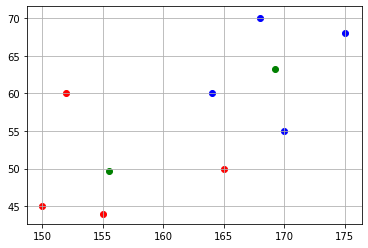

In [16]:
plt.scatter(X[y==0,0], X[y==0, 1], color='red')
plt.scatter(X[y==1,0], X[y==1, 1], color='blue')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='green')
plt.grid()
plt.show()

## Case: Pengunjung Mall

In [17]:
df_mall = pd.read_csv('mall.csv')

In [19]:
df_mall.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


In [20]:
df_mall.shape

(200, 5)

In [21]:
X = df_mall.iloc[:, [3,4]].values

In [36]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y = kmeans.fit_predict(X)

In [37]:
y

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [38]:
pd.value_counts(y)

1    81
2    39
4    35
3    23
0    22
dtype: int64

In [39]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

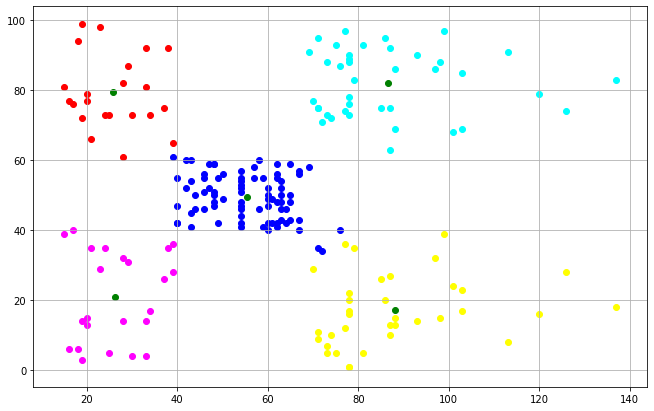

In [41]:
plt.figure(figsize=(11,7))
plt.scatter(X[y==0,0], X[y==0, 1], color='red')
plt.scatter(X[y==1,0], X[y==1, 1], color='blue')
plt.scatter(X[y==2,0], X[y==2, 1], color='cyan')
plt.scatter(X[y==3,0], X[y==3, 1], color='magenta')
plt.scatter(X[y==4,0], X[y==4, 1], color='yellow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='green')
plt.grid()
plt.show()

## Pemilihan nilai K

In [33]:
elbow = []
for k in range(1,21):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(X)
    elbow.append(km.inertia_)

In [34]:
elbow

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25336.94686147186,
 21850.16528258562,
 19634.554629349972,
 17602.190468386776,
 16019.406429681436,
 14666.474696940497,
 13075.246656284893,
 12326.746980212767,
 11130.93857195436,
 10362.12898351649,
 9709.853148408922,
 8887.925034855809,
 7955.2033010340765]

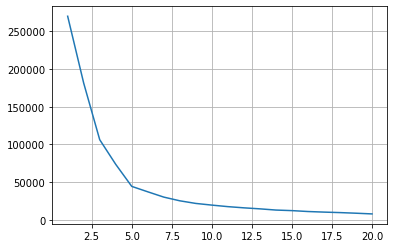

In [35]:
# Visualisasi Elbow
plt.plot(range(1,21), elbow)
plt.grid()
plt.show()